In [15]:
##Author : Suruj Kalita  
#Date : 7 / 23 / 2023 5.56 
#Description : Suruj Kalita Working in  Pytorch for Deep Learning . Most of the compiled cell are done using CPU not GPU . 
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
# pip install torchvision
# import torch
# print(torch.__version__)   cmd line terminal  
#nvidia-smi    anaconda cmd line CUDA VERSION CHECK OUT 

In [16]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:20<00:00, 1264685.62it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 160987.92it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1539695.50it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5168089.28it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [17]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [18]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [20]:
#In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model’s parameters.

In [21]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [22]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [23]:
##Change the epoch value for better training accuracy

epochs = 7
for t in range(epochs):
    print(f"Epoch {t+1}\n")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")
#printing the loss function and optimizing the model

Epoch 1

loss: 2.304074  [   64/60000]
loss: 2.294053  [ 6464/60000]
loss: 2.275941  [12864/60000]
loss: 2.272241  [19264/60000]
loss: 2.255129  [25664/60000]
loss: 2.219324  [32064/60000]
loss: 2.234497  [38464/60000]
loss: 2.189230  [44864/60000]
loss: 2.202710  [51264/60000]
loss: 2.177222  [57664/60000]
Test Error: 
 Accuracy: 37.9%, Avg loss: 2.162404 

Epoch 2

loss: 2.169822  [   64/60000]
loss: 2.156894  [ 6464/60000]
loss: 2.101897  [12864/60000]
loss: 2.122873  [19264/60000]
loss: 2.062843  [25664/60000]
loss: 2.003542  [32064/60000]
loss: 2.041240  [38464/60000]
loss: 1.952759  [44864/60000]
loss: 1.979413  [51264/60000]
loss: 1.906928  [57664/60000]
Test Error: 
 Accuracy: 55.1%, Avg loss: 1.894717 

Epoch 3

loss: 1.929265  [   64/60000]
loss: 1.889549  [ 6464/60000]
loss: 1.779046  [12864/60000]
loss: 1.824212  [19264/60000]
loss: 1.702896  [25664/60000]
loss: 1.657862  [32064/60000]
loss: 1.692356  [38464/60000]
loss: 1.591034  [44864/60000]
loss: 1.630182  [51264/60000]

##Re-Optimizing it 

In [24]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [25]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [26]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

##Setting up the Hyper parameters

In [27]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [28]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [29]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
##Optimizer aLGO HELPS IN THE TRAINING FOR LOSS IN EPOCH VALUES

In [30]:
##iMPLEMENTING THE MODEL
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.295734  [   64/60000]
loss: 2.287287  [ 6464/60000]
loss: 2.271895  [12864/60000]
loss: 2.275251  [19264/60000]
loss: 2.246794  [25664/60000]
loss: 2.220538  [32064/60000]
loss: 2.229888  [38464/60000]
loss: 2.197599  [44864/60000]
loss: 2.195613  [51264/60000]
loss: 2.167254  [57664/60000]
Test Error: 
 Accuracy: 44.6%, Avg loss: 2.162971 

Epoch 2
-------------------------------
loss: 2.169585  [   64/60000]
loss: 2.161513  [ 6464/60000]
loss: 2.105888  [12864/60000]
loss: 2.125839  [19264/60000]
loss: 2.072796  [25664/60000]
loss: 2.010299  [32064/60000]
loss: 2.036906  [38464/60000]
loss: 1.963664  [44864/60000]
loss: 1.968559  [51264/60000]
loss: 1.897123  [57664/60000]
Test Error: 
 Accuracy: 56.7%, Avg loss: 1.897566 

Epoch 3
-------------------------------
loss: 1.928471  [   64/60000]
loss: 1.904728  [ 6464/60000]
loss: 1.783593  [12864/60000]
loss: 1.822376  [19264/60000]
loss: 1.721625  [25664/60000]
loss: 1.656243  [32064/600

In [32]:
##fURTHER SAVING AND LOADING THE Model
import torch
import torchvision.models as models

In [33]:
# model = models.vgg16(weights='IMAGENET1K_V1')
# torch.save(model.state_dict(), 'model_weights.pth')

# will load the data from the directory   specified

In [34]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [35]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [36]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3) # repeats values of r1 because of re-seed

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [37]:
#The torch.manualseed() function in PyTorch enables you to set the random seed for all devices (both CPU and CUDA). This can be particularly useful when reproducing results , as setting the same seed ensures that the same results are obtained.

In [38]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# uncomment this line to get a runtime error
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [39]:
#Training the pytorch_model with the following   parameters  and return  the results

In [40]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

In [41]:
# Layer C1 is a convolutional layer, meaning that it scans the input image for features it learned during training. It outputs a map of where it saw each of its learned features in the image. This “activation map” is downsampled in layer S2.

# Layer C3 is another convolutional layer, this time scanning C1’s activation map for combinations of features. It also puts out an activation map describing the spatial locations of these feature combinations, which is downsampled in layer S4.

# Finally, the fully-connected layers at the end, F5, F6, and OUTPUT, are a classifier that takes the final activation map, and classifies it into one of ten bins representing the 10 digits.

In [42]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [2]:
#%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])


In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)     ##Downloaded the datasets from the  internet    

100%|██████████| 170498071/170498071 [01:31<00:00, 1863055.45it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data


In [4]:
# Check if GPU is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [5]:
# Now you can use 'device' as an argument when creating or moving tensors
# For example, creating a tensor on the GPU:
tensor_on_gpu = torch.tensor([1, 2, 3], device=device)

In [6]:
# Or moving an existing tensor to the GPU:
tensor_on_cpu = torch.tensor([4, 5, 6])
tensor_on_gpu = tensor_on_cpu.to(device)

In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,  shuffle=True, num_workers=2)
                                         

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck plane   car  deer


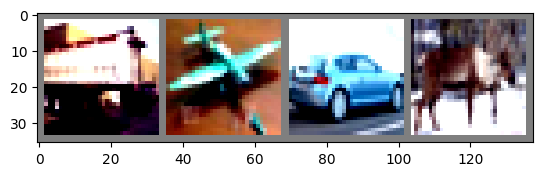

In [8]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
##Point to keep in mind that the data is mined from the training dataset that hav been downloaded from the Internet for  testing

In [9]:
##In depth Training of the Models for   testing purposes

In [10]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [11]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


truck truck   cat   car


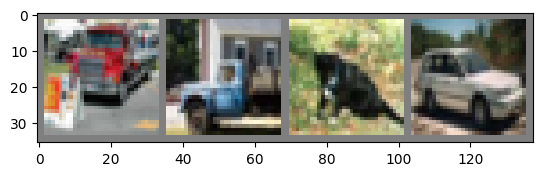

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#Numpy and Matplotlib actually represents 3 dimension in x,y,z format. Whereas pytorch represents them as z,x,y. So with (np.transpose(npimg, (1, 2, 0)) we are telling numpy the mapping of the indexed. i.e.
# for a torch Image matrix with shape (3,32,32) where 3 is z (channel) 32 is x and 32 is y (np.transpose(npimg, (1, 2, 0)) 
# says transpose the given matrix npimg into numpy where value of x,y.z are at index 1,2,0 respectively.

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [16]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.202
[1,  4000] loss: 1.847
[1,  6000] loss: 1.644
[1,  8000] loss: 1.553
[1, 10000] loss: 1.484
[1, 12000] loss: 1.455
[2,  2000] loss: 1.350
[2,  4000] loss: 1.341
[2,  6000] loss: 1.295
[2,  8000] loss: 1.286
[2, 10000] loss: 1.275
[2, 12000] loss: 1.241
Finished Training


In [17]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

#overfitting the network

Accuracy of the network on the 10000 test images: 55 %


In [18]:
#lets get hands on Models with pytorch models

In [19]:
#One important behavior of torch.nn.Module is registering parameters. If a particular Module subclass has learning weights, these weights are expressed as instances of torch.nn.Parameter. The Parameter class is a subclass of torch.Tensor, with the special behavior that when they are assigned as attributes of a Module, they are added to the list of that modules parameters. These parameters may be accessed through the parameters() method on the Module class.


In [20]:
import torch

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.linear1 = torch.nn.Linear(100, 200)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(200, 10)
        self.softmax = torch.nn.Softmax()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x

tinymodel = TinyModel()

print('The model:')
print(tinymodel)

print('\n\nJust one layer:')
print(tinymodel.linear2)

print('\n\nModel params:')
for param in tinymodel.parameters():
    print(param)

print('\n\nLayer params:')
for param in tinymodel.linear2.parameters():
    print(param)

The model:
TinyModel(
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


Just one layer:
Linear(in_features=200, out_features=10, bias=True)


Model params:
Parameter containing:
tensor([[-0.0309,  0.0049,  0.0892,  ..., -0.0749,  0.0379, -0.0382],
        [-0.0905,  0.0802, -0.0022,  ..., -0.0437, -0.0488,  0.0933],
        [-0.0911, -0.0777, -0.0701,  ...,  0.0171,  0.0047,  0.0551],
        ...,
        [-0.0471,  0.0585,  0.0495,  ..., -0.0608, -0.0455, -0.0056],
        [-0.0320,  0.0727,  0.0675,  ..., -0.0802, -0.0703,  0.0156],
        [-0.0605, -0.0298,  0.0505,  ..., -0.0730, -0.0105,  0.0938]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0855, -0.0982, -0.0794, -0.0544,  0.0806,  0.0926, -0.0633,  0.0638,
         0.0437, -0.0026,  0.0009,  0.0501,  0.0305,  0.0997,  0.0781, -0.0407,
         0.0643,  0.0865,  0.0417, -0.04

In [21]:
#The most basic type of neural network layer is a linear or fully connected layer

In [22]:
lin = torch.nn.Linear(3, 2)
x = torch.rand(1, 3)
print('Input:')
print(x)

print('\n\nWeight and Bias parameters:')
for param in lin.parameters():
    print(param)

y = lin(x)
print('\n\nOutput:')
print(y)

Input:
tensor([[0.1815, 0.9368, 0.6614]])


Weight and Bias parameters:
Parameter containing:
tensor([[-0.0029,  0.0547, -0.0380],
        [-0.1191,  0.4557, -0.1270]], requires_grad=True)
Parameter containing:
tensor([-0.5605,  0.0688], requires_grad=True)


Output:
tensor([[-0.5349,  0.3900]], grad_fn=<AddmmBackward0>)


# Convolutional Layer

In [23]:
import torch.functional as F


class LeNet(torch.nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = torch.nn.Conv2d(1, 6, 5)
        self.conv2 = torch.nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = torch.nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [24]:
##Recurrent Layers for  Training    
class LSTMTagger(torch.nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = torch.nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = torch.nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = torch.nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

##The Common in all MACHINE lEARNING mODEL
# DATA MANIPULATION 

In [25]:
my_tensor = torch.rand(1, 6, 6)
print(my_tensor)

maxpool_layer = torch.nn.MaxPool2d(3)
print(maxpool_layer(my_tensor))

tensor([[[0.6859, 0.7932, 0.8338, 0.9590, 0.2641, 0.1660],
         [0.2654, 0.9027, 0.9220, 0.6444, 0.6747, 0.2995],
         [0.4888, 0.5098, 0.3080, 0.0583, 0.2825, 0.3148],
         [0.1638, 0.0512, 0.1615, 0.5906, 0.2258, 0.3892],
         [0.7876, 0.0177, 0.1310, 0.1447, 0.8241, 0.5342],
         [0.8331, 0.0597, 0.1203, 0.3279, 0.3015, 0.1317]]])
tensor([[[0.9220, 0.9590],
         [0.8331, 0.8241]]])


#If you look closely at the values above, you’ll see that each of the values in the maxpooled output is the maximum value of each quadrant of the 6x6 input.

In [26]:
##  Normaloization layers for   the model
my_tensor = torch.rand(1, 4, 4) * 20 + 5
print(my_tensor)

print(my_tensor.mean())

norm_layer = torch.nn.BatchNorm1d(4)
normed_tensor = norm_layer(my_tensor)
print(normed_tensor)

print(normed_tensor.mean())

tensor([[[ 5.8660, 21.1776, 17.9503, 15.0416],
         [10.1546, 24.7282, 15.7750,  7.6593],
         [19.1055,  6.7212, 18.3585, 20.6587],
         [15.2614, 22.7818, 20.4855, 17.8114]]])
tensor(16.2210)
tensor([[[-1.6019,  1.0808,  0.5154,  0.0057],
         [-0.6750,  1.5482,  0.1824, -1.0556],
         [ 0.5223, -1.7125,  0.3875,  0.8026],
         [-1.3546,  1.3097,  0.4962, -0.4512]]],
       grad_fn=<NativeBatchNormBackward0>)
tensor(1.3411e-07, grad_fn=<MeanBackward0>)


In [27]:
my_tensor = torch.rand(1, 4, 4)

dropout = torch.nn.Dropout(p=0.4)
print(dropout(my_tensor))
print(dropout(my_tensor))

#dropout_layers
#fur5ther steps Activation layer and Loss Functions

tensor([[[0.0000, 0.5150, 0.2269, 1.4359],
         [0.0000, 0.6797, 0.7378, 0.8853],
         [0.0000, 1.4113, 1.5381, 0.5698],
         [1.1471, 1.1963, 0.7030, 1.2244]]])
tensor([[[0.6937, 0.5150, 0.2269, 1.4359],
         [1.6173, 0.0000, 0.7378, 0.8853],
         [0.0000, 0.0000, 1.5381, 0.5698],
         [1.1471, 0.0000, 0.7030, 0.0000]]])


# PYTORCH TENSORBOARD SUPPORT

In [28]:
# PyTorch model and training necessities
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Image datasets and image manipulation
import torchvision
import torchvision.transforms as transforms

# Image display
import matplotlib.pyplot as plt
import numpy as np

# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter

# In case you are using an environment that has TensorFlow installed,
# such as Google Colab, uncomment the following code to avoid
# a bug with saving embeddings to your TensorBoard directory

# import tensorflow as tf
# import tensorboard as tb
# tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

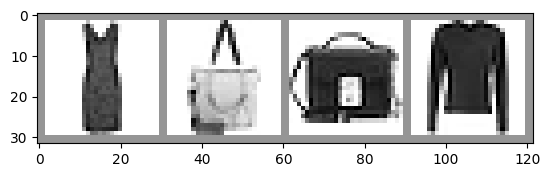

In [29]:
# Gather datasets and prepare them for consumption
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Store separate training and validations splits in ./data
training_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
validation_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

training_loader = torch.utils.data.DataLoader(training_set,
                                              batch_size=4,
                                              shuffle=True,
                                              num_workers=2)


validation_loader = torch.utils.data.DataLoader(validation_set,
                                                batch_size=4,
                                                shuffle=False,
                                                num_workers=2)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Extract a batch of 4 images
dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)

In [30]:
# Default log_dir argument is "runs" - but it's good to be specific
# torch.utils.tensorboard.SummaryWriter is imported above
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

# Write image data to TensorBoard log dir
writer.add_image('Four Fashion-MNIST Images', img_grid)
writer.flush()

# To view, start TensorBoard on the command line with:
#   tensorboard --logdir=runs
# ...and open a browser tab to http://localhost:6006/

In [31]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#Graphing Scalars to Visualize Trainin

In [32]:
print(len(validation_loader))
for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0

    for i, data in enumerate(training_loader, 0):
        # basic training loop
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # Every 1000 mini-batches...
            print('Batch {}'.format(i + 1))
            # Check against the validation set
            running_vloss = 0.0

            net.train(False) # Don't need to track gradents for validation
            for j, vdata in enumerate(validation_loader, 0):
                vinputs, vlabels = vdata
                voutputs = net(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()
            net.train(True) # Turn gradients back on for training

            avg_loss = running_loss / 1000
            avg_vloss = running_vloss / len(validation_loader)

            # Log the running loss averaged per batch
            writer.add_scalars('Training vs. Validation Loss',
                            { 'Training' : avg_loss, 'Validation' : avg_vloss },
                            epoch * len(training_loader) + i)

            running_loss = 0.0
print('Finished Training')

writer.flush()

2500
Batch 1000
Batch 2000
Batch 3000
Batch 4000
Batch 5000
Batch 6000
Batch 7000
Batch 8000
Batch 9000
Batch 10000
Batch 11000
Batch 12000
Batch 13000
Batch 14000
Batch 15000
Finished Training


# Visualizing the Models

In [33]:
# Again, grab a single mini-batch of images
dataiter = iter(training_loader)
images, labels = next(dataiter)

# add_graph() will trace the sample input through your model,
# and render it as a graph.
writer.add_graph(net, images)
writer.flush()

Visualoizing your data 
#tHE 28 BY 28 IMAGE TILES 
#The 28-by-28 image tiles we’re using can be modeled as 784-dimensional vectors (28 * 28 = 784). It can be instructive to project this to a lower-dimensional representation.

In [34]:
# Select a random subset of data and corresponding labels
def select_n_random(data, labels, n=100):
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# Extract a random subset of data
images, labels = select_n_random(training_set.data, training_set.targets)

# get the class labels for each image
class_labels = [classes[label] for label in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.flush()
writer.close()

In [35]:
#https://pytorch.org/tutorials/beginner/introyt/trainingyt.html

# Training  with pytorch

# Dataset and DataLoader
#The Dataset and DataLoader classes encapsulate the process of pulling your data from storage and exposing it to your training loop in batches.
#The Dataset is responsible for accessing and processing single instances of data.
#The DataLoader pulls instances of data from the Dataset (either automatically or with a sampler that you define), collects them in batches, and returns them for consumption by your training loop. The DataLoader works with all kinds of datasets, regardless of the type of data they contain.

In [36]:
import torch
import torchvision
import torchvision.transforms as transforms

# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime


transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Create datasets for training & validation, download if necessary
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

# Create data loaders for our datasets; shuffle for training, not for validation
training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Report split sizes
print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

Training set has 60000 instances
Validation set has 10000 instances


Coat  Ankle Boot  Shirt  Dress


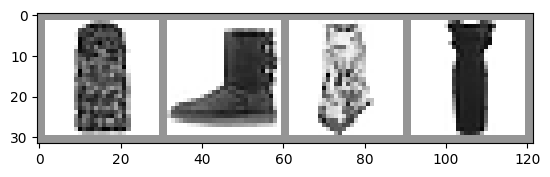

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(4)))

 The Model

The Model we will use is variant of Le-net 

In [38]:
import torch.nn as nn
import torch.nn.functional as F

# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = GarmentClassifier()

In PyTorch, self.fc1 = nn.Linear(16 * 4 * 4, 120) is a linear layer with 16 * 4 * 4 input features and 120 output features. The input features are the flattened output of the previous convolutional layer. The first argument of nn.Linear is the number of input features and the second argument is the number of output features 


In PyTorch, `self.pool = nn.MaxPool2d(2, 2)` is a max pooling layer with a kernel size of 2 and stride of 2. It reduces the spatial dimensions of the input tensor by a factor of 2 .

`self.conv2 = nn.Conv2d(6, 16, 5)` is a convolutional layer with 6 input channels, 16 output channels and a kernel size of 5 .

In PyTorch, `x = self.pool(F.relu(self.conv1(x)))` applies a convolutional operation on the input tensor `x` using the `self.conv1` layer, applies the ReLU activation function on the output of the convolutional operation and then applies max pooling on the output of the ReLU activation function using the `self.pool` layer.

Similarly, `x = self.pool(F.relu(self.conv2(x)))` applies a convolutional operation on the input tensor `x` using the `self.conv2` layer, applies the ReLU activation function on the output of the convolutional operation and then applies max pooling on the output of the ReLU activation function using the `self.pool` layer.

Loss Function

In [39]:
loss_fn = torch.nn.CrossEntropyLoss()

# NB: Loss functions expect data in batches, so we're creating batches of 4
# Represents the model's confidence in each of the 10 classes for a given input
dummy_outputs = torch.rand(4, 10) #In PyTorch, `dummy_outputs = torch.rand(4, 10)` creates a tensor of size `(4, 10)` with random values between 0 and 1.
# Represents the correct class among the 10 being tested
dummy_labels = torch.tensor([1, 5, 3, 7]) #In PyTorch, `dummy_labels = torch.tensor([1, 5, 3, 7])` creates a tensor of size `(4,)` with the values `[1, 5, 3, 7]`.

print(dummy_outputs) 
print(dummy_labels)

loss = loss_fn(dummy_outputs, dummy_labels)
print('Total loss for this batch: {}'.format(loss.item()))

tensor([[0.8405, 0.1183, 0.5852, 0.1916, 0.9571, 0.1098, 0.5586, 0.1427, 0.5616,
         0.9749],
        [0.0718, 0.1095, 0.2829, 0.2598, 0.6740, 0.3991, 0.3320, 0.3944, 0.8822,
         0.0325],
        [0.9201, 0.2253, 0.4730, 0.6572, 0.4511, 0.6796, 0.4738, 0.5562, 0.1874,
         0.8523],
        [0.3374, 0.9002, 0.3250, 0.0719, 0.4401, 0.2800, 0.1662, 0.2163, 0.3715,
         0.2584]])
tensor([1, 5, 3, 7])
Total loss for this batch: 2.4227428436279297


In [40]:
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

Per-Epoch Activity
Perform validation by checking our relative loss on a set of data that was not used for training, and report this

Save a copy of the model

In [41]:
# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 5

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:
  batch 1000 loss: 2.3042330253124237
  batch 2000 loss: 2.304870586872101
  batch 3000 loss: 2.3055677525997162
  batch 4000 loss: 2.305429480075836
  batch 5000 loss: 2.304557284116745
  batch 6000 loss: 2.3044556164741516
  batch 7000 loss: 2.3050419239997866
  batch 8000 loss: 2.3063062646389008
  batch 9000 loss: 2.306635529279709
  batch 10000 loss: 2.303912518978119
  batch 11000 loss: 2.304913145542145
  batch 12000 loss: 2.305771007537842
  batch 13000 loss: 2.3056732437610625
  batch 14000 loss: 2.3048777997493746
  batch 15000 loss: 2.3049796731472014
LOSS train 2.3049796731472014 valid 2.305194616317749
EPOCH 2:
  batch 1000 loss: 2.305570068359375
  batch 2000 loss: 2.304577085494995
  batch 3000 loss: 2.307650312662125
  batch 4000 loss: 2.3046603014469147
  batch 5000 loss: 2.305166834592819
  batch 6000 loss: 2.306187185049057
  batch 7000 loss: 2.3051128406524657
  batch 8000 loss: 2.303359694957733
  batch 9000 loss: 2.30638964676857
  batch 10000 loss: 2.304

Saving it and further loading it in the 

In [ ]:
# saved_model = GarmentClassifier()
# saved_model.load_state_dict(torch.load(PATH))  ##DO DEFINE THE PATH OF THYE MODEL TO BE LOADED

Try Tensoarboard for sharing the models

Object-detection-Pytorch

In [72]:
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread(r"C:\Users\SURUJ_KALITA\IIT-INTER\scr.png")
# plt.imshow(img1)
##use diffrent AppROACH FOR DETECTION OTHER THEN PYTORCH COMPUTER VISION EASY WAY

TRANSFER LEARNING FOR COMPUTER VISION TUTORIAL

In [73]:
# https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

Finetuning the ConvNet: Instead of random initialization, we initialize the network with a pretrained network, like the one that is trained on imagenet 1000 dataset. Rest of the training looks as usual.

ConvNet as fixed feature extractor: Here, we will freeze the weights for all of the network except that of the final fully connected layer. This last fully connected layer is replaced with a new one with random weights and only this layer is trained.

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()

Load Data

In [10]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                   for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [76]:
# Visualizing few images from datasets

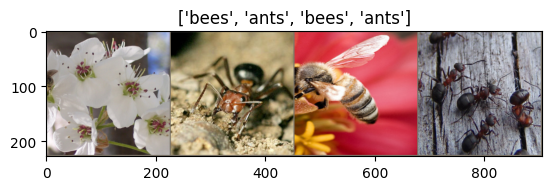

In [11]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.002)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

Training the Model

Scheduling the learning rate
Saving the best model

In [12]:
# lr_scheduler object from torch.optim.lr_scheduler.

In [13]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

Visualizing the model predictions

In [14]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

Finetuning the ConvNet

In [15]:
##Loading prtrained model and reset finjal fully connected layers

In [16]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [17]:
##Train and Evaluate

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
train Loss: 0.5736 Acc: 0.7008
val Loss: 0.2945 Acc: 0.8889

Epoch 1/9
----------
train Loss: 0.5937 Acc: 0.7459
val Loss: 0.2020 Acc: 0.9216

Epoch 2/9
----------
train Loss: 0.5190 Acc: 0.8361
val Loss: 0.2261 Acc: 0.9477

Epoch 3/9
----------
train Loss: 0.5767 Acc: 0.7418
val Loss: 0.3971 Acc: 0.8497

Epoch 4/9
----------
train Loss: 0.6361 Acc: 0.7787
val Loss: 0.2500 Acc: 0.8889

Epoch 5/9
----------
train Loss: 0.4195 Acc: 0.7787
val Loss: 0.3796 Acc: 0.8497

Epoch 6/9
----------
train Loss: 0.3568 Acc: 0.8566
val Loss: 0.3876 Acc: 0.8889

Epoch 7/9
----------
train Loss: 0.3518 Acc: 0.8852
val Loss: 0.3376 Acc: 0.9020

Epoch 8/9
----------
train Loss: 0.3143 Acc: 0.8607
val Loss: 0.3547 Acc: 0.9150

Epoch 9/9
----------
train Loss: 0.2625 Acc: 0.8893
val Loss: 0.3490 Acc: 0.9085

Training complete in 6m 21s
Best val Acc: 0.947712


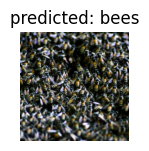

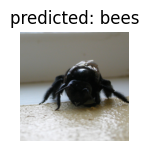

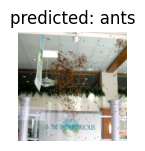

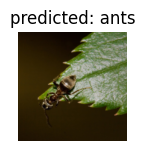

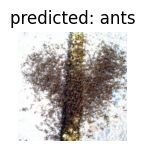

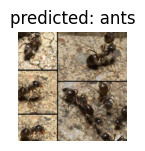

In [18]:
visualize_model(model_ft)

Fixed - Feature - Extraction 

In [85]:
# Autograd is a reverse automatic differentiation system. Conceptually, autograd records a graph recording all of the operations that created the data as you execute operations, 
# giving you a directed acyclic graph whose leaves are the input tensors and roots are the output tensors. 

# https://pytorch.org/docs/master/notes/autograd.html       in case to read more about

In [19]:
#  freeze all the network except the final layeR
# requires_grad = False to freeze the parameters so that the gradients are not computed in backward().

model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [20]:
# TRAIN AND EVALUATE 

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.8197 Acc: 0.5902
val Loss: 0.3817 Acc: 0.8431

Epoch 1/24
----------
train Loss: 0.5001 Acc: 0.7541
val Loss: 0.2448 Acc: 0.8954

Epoch 2/24
----------
train Loss: 0.4843 Acc: 0.7787
val Loss: 0.2350 Acc: 0.9150

Epoch 3/24
----------
train Loss: 0.4927 Acc: 0.7910
val Loss: 0.2521 Acc: 0.9150

Epoch 4/24
----------
train Loss: 0.4442 Acc: 0.8074
val Loss: 0.2560 Acc: 0.9020

Epoch 5/24
----------
train Loss: 0.3020 Acc: 0.8648
val Loss: 0.3193 Acc: 0.8693

Epoch 6/24
----------
train Loss: 0.5789 Acc: 0.7623
val Loss: 0.1857 Acc: 0.9608

Epoch 7/24
----------
train Loss: 0.3485 Acc: 0.8402
val Loss: 0.1960 Acc: 0.9608

Epoch 8/24
----------
train Loss: 0.3419 Acc: 0.8525
val Loss: 0.2019 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.3113 Acc: 0.8607
val Loss: 0.1917 Acc: 0.9608

Epoch 10/24
----------
train Loss: 0.2209 Acc: 0.8975
val Loss: 0.1884 Acc: 0.9542

Epoch 11/24
----------
train Loss: 0.3592 Acc: 0.8484
val Loss: 0.1809 Acc: 0.9477

Ep

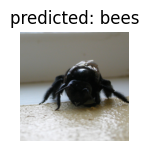

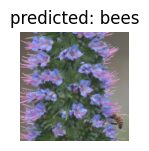

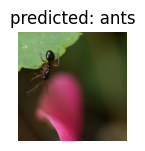

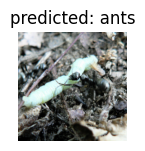

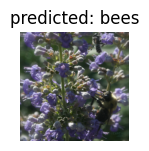

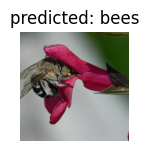

In [21]:
visualize_model(model_conv)

plt.ioff()
plt.show()

Inference on custom images

In [22]:
def visualize_model_predictions(model,img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])

        model.train(mode=was_training)

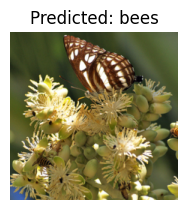

In [23]:
visualize_model_predictions(
    model_conv,
    img_path='data/hymenoptera_data/val/bees/72100438_73de9f17af.jpg'
)

plt.ioff()
plt.show()

In [91]:
#https://pytorch.org/tutorials/intermediate/spatial_transformer_tutorial.html

ADVERSARIAL EXAMPLE GENERATION

In [92]:
# Threat Model 
# However, in general the overarching goal is to add the least amount of perturbation to the input data to cause the desired misclassification. 
# There are several kinds of assumptions of the attacker’s knowledge, two of which are: white-box and black-box. A white-box attack assumes the 
# attacker has full knowledge and access to the model, including architecture, inputs, outputs, and weights. A black-box attack assumes the attacker only has access to the inputs and outputs of the model, and knows nothing about the underlying architecture or weights. 

https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/56c122e1c18e5e07666673e900acaed5/fgsm_tutorial.ipynb

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Implementation


In [26]:
epsilons = [0, .05, .1, .15, .2, .25, .3]
pretrained_model = "Data/lenet_mnist_model.pth"
use_cuda=True
# Set random seed for reproducibility
torch.manual_seed(42)

In [27]:
# LeNet Model definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

# MNIST Test dataset and dataloader declaration
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([       ##datasets.MNIST('../data')  downloaded or directing to the data path
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            ])),
        batch_size=1, shuffle=True)


# Initialize the network
model = Net().to(device)


# Set the model in evaluation mode. In this case this is for the Dropout layers
model.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

FGSM Attack 

Now, we can define the function that creates the adversarial examples by perturbing the original inputs. The fgsm_attack function takes three inputs, image is the original clean image ( x ), epsilon is the pixel-wise perturbation amount ( ϵ ), and data_grad is gradient of the loss w.r.t the input image ( ∇xJ(θ,x,y) ). The function then creates perturbed image as

perturbed_image=image+epsilon∗sign(data_grad)=x+ϵ∗sign(∇xJ(θ,x,y)) 

Finally, in order to maintain the original range of the data, the perturbed image is clipped to

In [96]:
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image

# restores the tensors to their original scale
def denorm(batch, mean=[0.1307], std=[0.3081]):
    """
    Convert a batch of tensors to their original scale.

    Args:
        batch (torch.Tensor): Batch of normalized tensors.
        mean (torch.Tensor or list): Mean used for normalization.
        std (torch.Tensor or list): Standard deviation used for normalization.

    Returns:
        torch.Tensor: batch of tensors without normalization applied to them.
    """
    if isinstance(mean, list):
        mean = torch.tensor(mean).to(device)
    if isinstance(std, list):
        std = torch.tensor(std).to(device)

    return batch * std.view(1, -1, 1, 1) + mean.view(1, -1, 1, 1)

Testing Function
Finally, the central result of this tutorial comes from the test function. Each call to this test function performs a full test step on the MNIST test set and 
reports a final accuracy. However, notice that this function also takes an epsilon input. This is because the test function reports the accuracy of a model that 
is under attack from an adversary with strength  ϵ . More specifically, for each sample in the test set, the function computes the gradient of the loss w.r.t the input data ( data_grad ),
 creates a perturbed image with fgsm_attack ( perturbed_data ), then checks to see if the perturbed example is adversarial. In addition to testing the accuracy of the model, the function also saves and returns some successful adversarial examples to be visualized later.


In [97]:
def test( model, device, test_loader, epsilon ):

    # Accuracy counter
    correct = 0
    adv_examples = []

    # Loop over all examples in test set
    for data, target in test_loader:

        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability

        # If the initial prediction is wrong, don't bother attacking, just move on
        if init_pred.item() != target.item():
            continue

        # Calculate the loss
        loss = F.nll_loss(output, target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect ``datagrad``
        data_grad = data.grad.data

        # Restore the data to its original scale
        data_denorm = denorm(data)

        # Call FGSM Attack
        perturbed_data = fgsm_attack(data_denorm, epsilon, data_grad)

        # Reapply normalization
        perturbed_data_normalized = transforms.Normalize((0.1307,), (0.3081,))(perturbed_data)

        # Re-classify the perturbed image
        output = model(perturbed_data_normalized)

        # Check for success
        final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        if final_pred.item() == target.item():
            correct += 1
            # Special case for saving 0 epsilon examples
            if epsilon == 0 and len(adv_examples) < 5:
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
        else:
            # Save some adv examples for visualization later
            if len(adv_examples) < 5:
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(len(test_loader))
    print(f"Epsilon: {epsilon}\tTest Accuracy = {correct} / {len(test_loader)} = {final_acc}")

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples

Run Attack

The last part of the implementation is to actually run the attack. Here, we run a full test step for each epsilon value in the epsilons input. 
For each epsilon we also save the final accuracy and 
some successful adversarial examples to be plotted in the coming sections. Notice how the printed accuracies decrease as the epsilon value increases. 
Also, note the  ϵ=0  case represents the original test accuracy, with no attack.

In [98]:
accuracies = []
examples = []

# Run test for each epsilon
for eps in epsilons:
    acc, ex = test(model, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)

Epsilon: 0	Test Accuracy = 842 / 10000 = 0.0842
Epsilon: 0.05	Test Accuracy = 263 / 10000 = 0.0263
Epsilon: 0.1	Test Accuracy = 54 / 10000 = 0.0054
Epsilon: 0.15	Test Accuracy = 21 / 10000 = 0.0021
Epsilon: 0.2	Test Accuracy = 14 / 10000 = 0.0014
Epsilon: 0.25	Test Accuracy = 18 / 10000 = 0.0018
Epsilon: 0.3	Test Accuracy = 24 / 10000 = 0.0024


Accuracy vs Epsilon

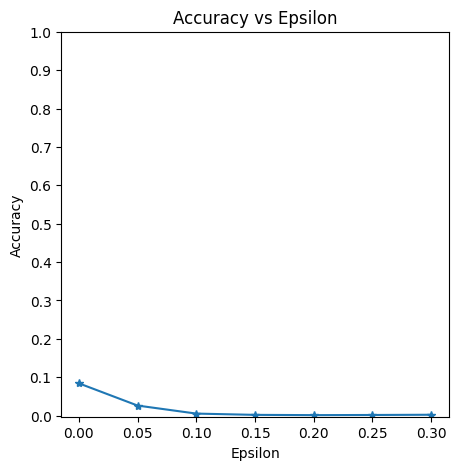

In [99]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()

Sample Adversarial Examples

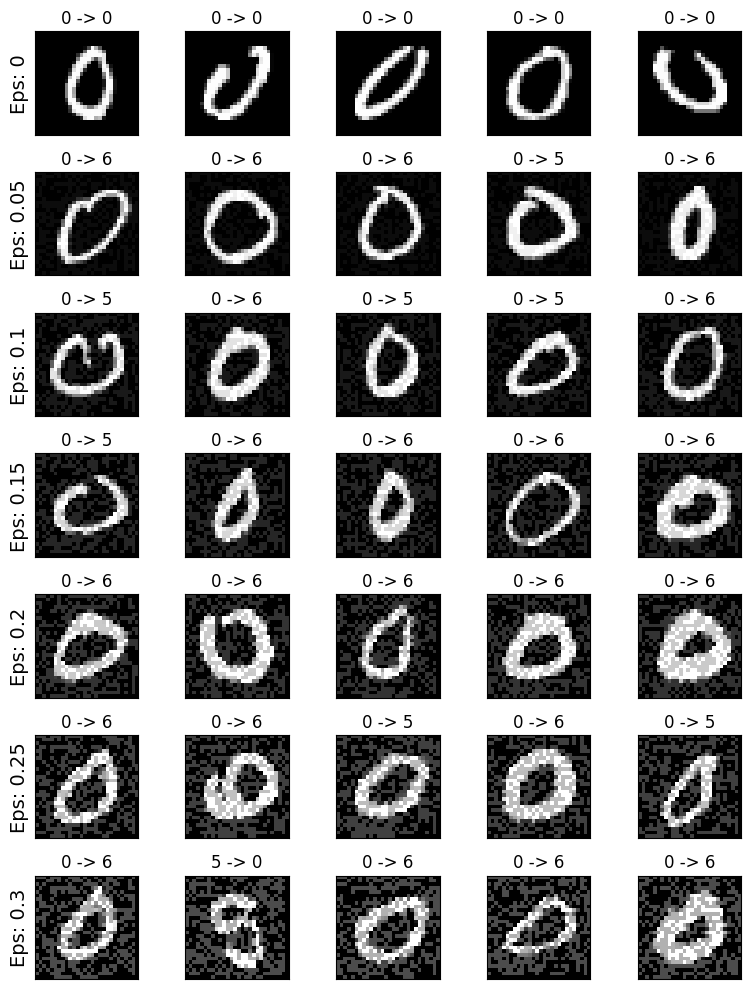

In [100]:
# Plot several examples of adversarial samples at each epsilon
cnt = 0
plt.figure(figsize=(8,10))
for i in range(len(epsilons)):
    for j in range(len(examples[i])):
        cnt += 1
        plt.subplot(len(epsilons),len(examples[0]),cnt)
        plt.xticks([], [])
        plt.yticks([], [])
        if j == 0:
            plt.ylabel(f"Eps: {epsilons[i]}", fontsize=14)
        orig,adv,ex = examples[i][j]
        plt.title(f"{orig} -> {adv}")
        plt.imshow(ex, cmap="gray")
plt.tight_layout()
plt.show()

DCGAN TUTORIAL

Introduction

GANs are a framework for teaching a deep learning model to capture the training data distribution so we can generate new data from that same distribution. GANs were invented by Ian Goodfellow in 2014 and first described in the paper Generative Adversarial Nets. They are made of two distinct models, a generator and a discriminator. The job of the generator is to spawn ‘fake’ 
images that look like the training images. The job of the discriminator is to look at an image and output whether or not it is a real training image or a fake image from the generator. During training, the generator is constantly trying to outsmart the discriminator by generating better and better fakes, while the discriminator is working to become a better detective and correctly classify the real and fake images.
 The equilibrium of this game is when the generator is generating perfect fakes that look as if they came directly from the training data, and the discriminator is left to always guess at 50% confidence that the generator output is real or fake.

In [1]:
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.use_deterministic_algorithms(True) # Needed for reproducible results

Random Seed:  999


In [27]:
# Root directory for dataset
dataroot = "data\celeba"
# dataroot = (r"C:\Users\SURUJ_KALITA\IIT-INTER\Data\celeba\real")

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 12

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [9]:
# UN - RUN CODE 



# EPOCHS = 2
# BATCH_SIZE = 10
# LEARNING_RATE = 0.003
# TRAIN_DATA_PATH = "./train_cl/"
# TEST_DATA_PATH = "./test_named_cl/"
# TRANSFORM_IMG = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(256),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std=[0.229, 0.224, 0.225] )
#     ])

# train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=TRANSFORM_IMG)
# train_data_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)
# test_data = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=TRANSFORM_IMG)
# test_data_loader  = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4) 


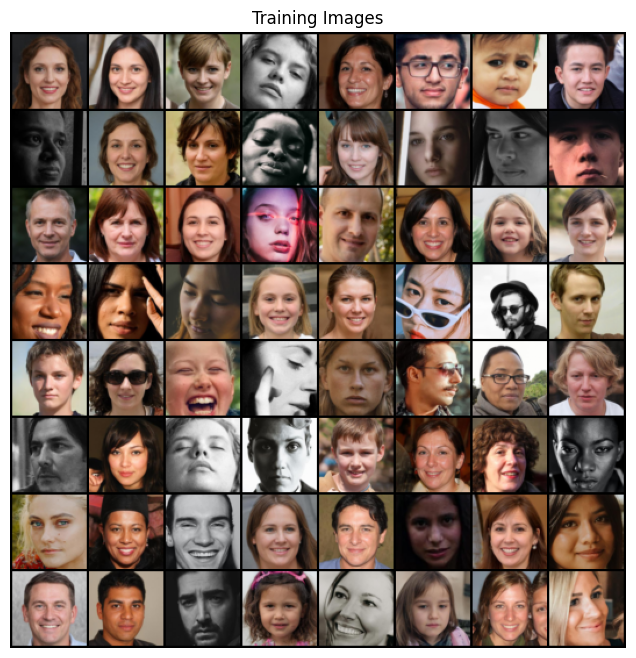

In [28]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset


dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

Implementation

In [29]:
# custom weights initialization called on ``netG`` and ``netD``
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

Generator


The generator, 
�
G, is designed to map the latent space vector (
�
z) to data-space. Since our data are images, converting 
�
z to data-space means ultimately creating a RGB image with the same size as the training images (i.e. 3x64x64). In practice, this is accomplished through a series of strided two dimensional convolutional transpose layers, each paired with a 2d batch norm layer and a relu activation. The output of the generator is fed through a tanh function to return it to the input data range of 
[−1,1] [−1,1]. It is worth noting the existence of the batch norm functions after the conv-transpose layers, as this is a critical contribution of the DCGAN paper. These layers help with the flow of gradients during training. An image of the generator from the DCGAN paper is shown below.

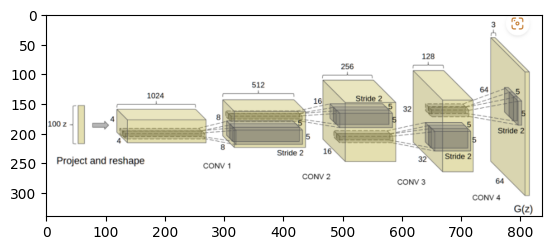

In [30]:
import cv2
import matplotlib.pyplot as plt
read = cv2.imread(r"C:\Users\SURUJ_KALITA\lr-in\IIT-INTER\GEN.png")
plt.imshow(read)

In [31]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)

In [32]:
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
#  to ``mean=0``, ``stdev=0.02``.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


Discriminator

As mentioned, the discriminator, 
�
D, is a binary classification network that takes an image as input and outputs a scalar probability that the input image is real (as opposed to fake). Here, 
�
D takes a 3x64x64 input image, processes it through a series of Conv2d, BatchNorm2d, and LeakyReLU layers, and outputs the final probability through a Sigmoid activation function. This architecture can be extended with more layers if necessary for the problem, but there is significance to the use of the strided convolution, BatchNorm, and LeakyReLUs. The DCGAN paper mentions it is a good practice to use strided convolution rather than pooling to downsample because it lets the network learn its own pooling function. Also batch norm and leaky relu functions promote healthy gradient flow which is critical for the learning process of both 
�
G and 
�
D.

In [33]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is ``(nc) x 64 x 64``
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf) x 32 x 32``
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*2) x 16 x 16``
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*4) x 8 x 8``
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*8) x 4 x 4``
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [34]:
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
# like this: ``to mean=0, stdev=0.2``.
netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


Loss Functions and Optimizers

ℓ(x,y)=L={l 
1
​
 ,…,l 
N
​
 } 
⊤
 ,l 
n
​
 =−[y 
n
​
 ⋅logx 
n
​
 +(1−y 
n
​
 )⋅log(1−x n)]

In [35]:
# Initialize the ``BCELoss`` function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

Training


Train Discriminator

Train the Generator

In [36]:
# Training Loop

# Training Loop
#Change the epoch for testing the datasets
# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 80 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/12][0/11]	Loss_D: 1.9646	Loss_G: 4.9221	D(x): 0.4269	D(G(z)): 0.5449 / 0.0114
[1/12][0/11]	Loss_D: 0.0996	Loss_G: 8.6411	D(x): 0.9351	D(G(z)): 0.0132 / 0.0004
[2/12][0/11]	Loss_D: 0.3822	Loss_G: 19.6423	D(x): 0.8121	D(G(z)): 0.0000 / 0.0000
[3/12][0/11]	Loss_D: 0.0945	Loss_G: 5.6042	D(x): 0.9672	D(G(z)): 0.0429 / 0.0102
[4/12][0/11]	Loss_D: 2.3943	Loss_G: 20.0329	D(x): 0.9458	D(G(z)): 0.7778 / 0.0000
[5/12][0/11]	Loss_D: 0.3588	Loss_G: 16.7967	D(x): 0.7915	D(G(z)): 0.0000 / 0.0000
[6/12][0/11]	Loss_D: 1.2775	Loss_G: 23.9364	D(x): 0.9428	D(G(z)): 0.6209 / 0.0000
[7/12][0/11]	Loss_D: 0.2510	Loss_G: 7.0274	D(x): 0.8829	D(G(z)): 0.0014 / 0.0020
[8/12][0/11]	Loss_D: 0.1195	Loss_G: 17.2369	D(x): 0.9276	D(G(z)): 0.0002 / 0.0000
[9/12][0/11]	Loss_D: 0.5573	Loss_G: 14.9528	D(x): 0.9672	D(G(z)): 0.3539 / 0.0000
[10/12][0/11]	Loss_D: 0.5138	Loss_G: 12.5306	D(x): 0.9055	D(G(z)): 0.1805 / 0.0000
[11/12][0/11]	Loss_D: 0.8905	Loss_G: 20.5257	D(x): 0.9565	D(G(z)): 0.4760 /

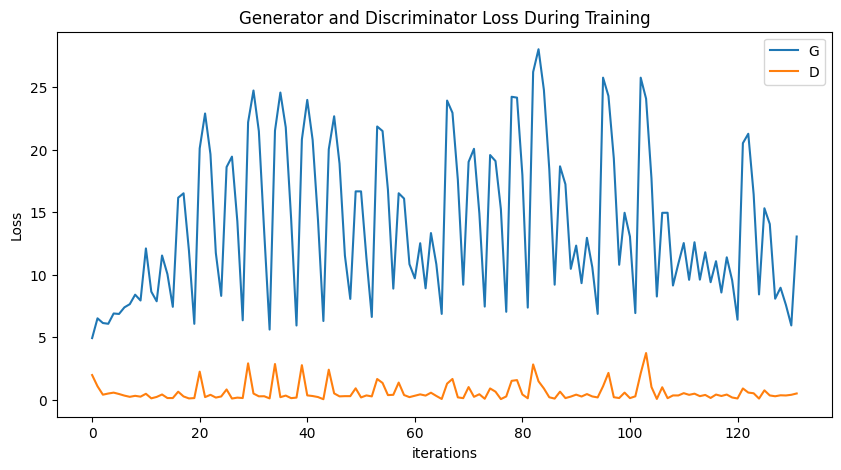

In [37]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

Visualization of G’s progression

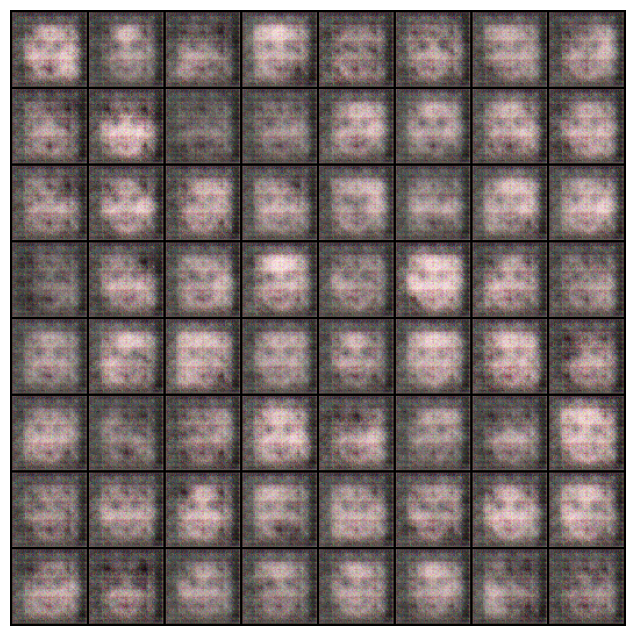

In [39]:
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

## feel free to test epoch run by run for bettre clarrification 

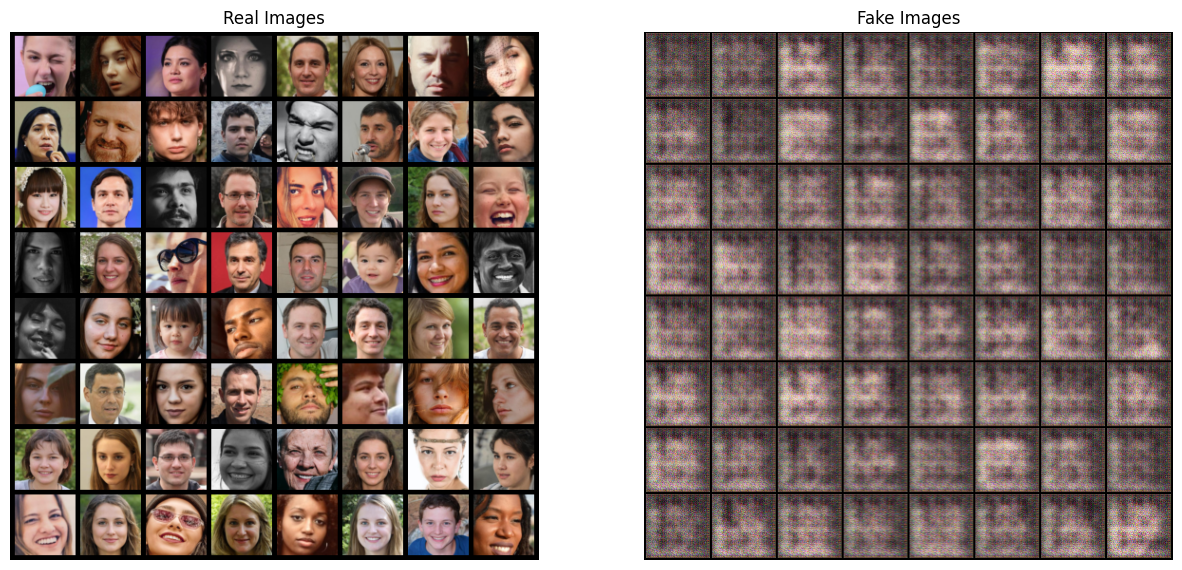

In [17]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

In [ ]:
# https://pytorch.org/tutorials/intermediate/spatial_transformer_tutorial.html

Spatial Transformers Networks Tutorial

In [18]:
# Spatial transformer networks are a generalization of differentiable attention to any spatial transformation. Spatial transformer networks (STN for short) allow a neural
#  network to learn how to perform spatial transformations on the 
# input image in order to enhance the geometric invariance of the model.
#  For example, it can crop a region of interest, scale and correct the orientation of an image.


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

plt.ion()   # interactive mode

In [19]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training dataset
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root='.', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])), batch_size=64, shuffle=True, num_workers=4)
# Test dataset
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root='.', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])), batch_size=64, shuffle=True, num_workers=4)

Depicting spatial transformers networks

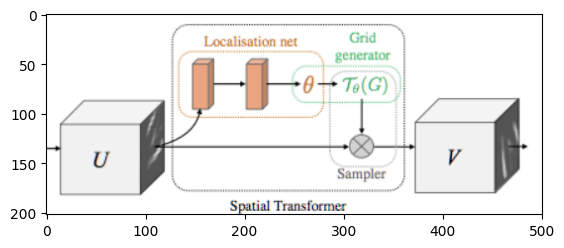

In [122]:
import cv2
import matplotlib.pyplot as plt
spat = cv2.imread(r"C:\Users\SURUJ_KALITA\lr-in\IIT-INTER\spat.png")
plt.imshow(spat)

In [123]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

        # Spatial transformer localization-network
        self.localization = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=7),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True),
            nn.Conv2d(8, 10, kernel_size=5),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True)
        )

        # Regressor for the 3 * 2 affine matrix
        self.fc_loc = nn.Sequential(
            nn.Linear(10 * 3 * 3, 32),
            nn.ReLU(True),
            nn.Linear(32, 3 * 2)
        )

        # Initialize the weights/bias with identity transformation
        self.fc_loc[2].weight.data.zero_()
        self.fc_loc[2].bias.data.copy_(torch.tensor([1, 0, 0, 0, 1, 0], dtype=torch.float))

    # Spatial transformer network forward function
    def stn(self, x):
        xs = self.localization(x)
        xs = xs.view(-1, 10 * 3 * 3)
        theta = self.fc_loc(xs)
        theta = theta.view(-1, 2, 3)

        grid = F.affine_grid(theta, x.size())
        x = F.grid_sample(x, grid)

        return x

    def forward(self, x):
        # transform the input
        x = self.stn(x)

        # Perform the usual forward pass
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


model = Net().to(device)

Training the Model

In [124]:
optimizer = optim.SGD(model.parameters(), lr=0.01)


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 500 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
#
# A simple test procedure to measure the STN performances on MNIST.
#


def test():
    with torch.no_grad():
        model.eval()
        test_loss = 0
        correct = 0
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)

            # sum up batch loss
            test_loss += F.nll_loss(output, target, size_average=False).item()
            # get the index of the max log-probability
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(test_loader.dataset)
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'
              .format(test_loss, correct, len(test_loader.dataset),
                      100. * correct / len(test_loader.dataset)))

Visualizing the STN results

c:\Users\SURUJ_KALITA\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\functional.py:4298: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Users\SURUJ_KALITA\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.288902
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.688243


c:\Users\SURUJ_KALITA\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.2312, Accuracy: 9342/10000 (93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.469621
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.607123

Test set: Average loss: 0.1499, Accuracy: 9547/10000 (95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.259108
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.251513

Test set: Average loss: 0.1021, Accuracy: 9694/10000 (97%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.217209
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.200745

Test set: Average loss: 0.0926, Accuracy: 9721/10000 (97%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.408957
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.091874

Test set: Average loss: 0.0696, Accuracy: 9796/10000 (98%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.067789
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.229662

Test set: Average loss: 0.0619, Accuracy: 9806/10000 (98%)

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.103548
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.098027

Test set: Average loss: 0.0623, Accuracy: 9816/10000 (98%)

Tra

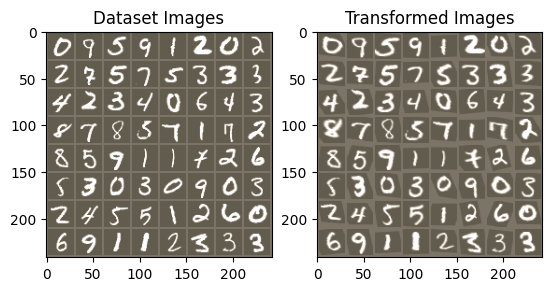

In [125]:
def convert_image_np(inp):
    """Convert a Tensor to numpy image."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    return inp

# We want to visualize the output of the spatial transformers layer
# after the training, we visualize a batch of input images and
# the corresponding transformed batch using STN.


def visualize_stn():
    with torch.no_grad():
        # Get a batch of training data
        data = next(iter(test_loader))[0].to(device)

        input_tensor = data.cpu()
        transformed_input_tensor = model.stn(data).cpu()

        in_grid = convert_image_np(
            torchvision.utils.make_grid(input_tensor))

        out_grid = convert_image_np(
            torchvision.utils.make_grid(transformed_input_tensor))

        # Plot the results side-by-side
        f, axarr = plt.subplots(1, 2)
        axarr[0].imshow(in_grid)
        axarr[0].set_title('Dataset Images')

        axarr[1].imshow(out_grid)
        axarr[1].set_title('Transformed Images')

for epoch in range(1, 20 + 1):
    train(epoch)
    test()

# Visualize the STN transformation on some input batch
visualize_stn()

plt.ioff()
plt.show()

OPTIMIZING VISION TRANSFORMER MODEL FOR DEPLOYMENT

In [35]:
# Vision Transformer models apply the cutting-edge attention-based transformer models, introduced in Natural Language Processing to achieve all kinds of the state of the art (SOTA) results, to Computer Vision tasks. 
# Facebook Data-efficient Image Transformers DeiT is a Vision Transformer model trained on ImageNet for image classification.

Classifying Images with DeiT

In [38]:
# pip install torch torchvision timm pandas requests

# pip install timm pandas requests

In [126]:
from PIL import Image
import torch
import timm
import requests
import torchvision.transforms as transforms
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD

print(torch.__version__)
# should be 1.8.0


model = torch.hub.load('facebookresearch/deit:main', 'deit_base_patch16_224', pretrained=True)
model.eval()

transform = transforms.Compose([
    transforms.Resize(256, interpolation=3),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD),
])

img = Image.open(requests.get("https://raw.githubusercontent.com/pytorch/ios-demo-app/master/HelloWorld/HelloWorld/HelloWorld/image.png", stream=True).raw)
img = transform(img)[None,]
out = model(img)
clsidx = torch.argmax(out)
print(clsidx.item())

c:\Users\SURUJ_KALITA\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.0.1+cpu


Using cache found in C:\Users\SURUJ_KALITA/.cache\torch\hub\facebookresearch_deit_main


269


Scripting DeiT

In [127]:
model = torch.hub.load('facebookresearch/deit:main', 'deit_base_patch16_224', pretrained=True)
model.eval()
scripted_model = torch.jit.script(model)
scripted_model.save("fbdeit_scripted.pt")

Using cache found in C:\Users\SURUJ_KALITA/.cache\torch\hub\facebookresearch_deit_main


Quantizing DeiT

In [128]:
# Use 'x86' for server inference (the old 'fbgemm' is still available but 'x86' is the recommended default) and ``qnnpack`` for mobile inference.
backend = "x86" # replaced with ``qnnpack`` causing much worse inference speed for quantized model on this notebook
model.qconfig = torch.quantization.get_default_qconfig(backend)
torch.backends.quantized.engine = backend

quantized_model = torch.quantization.quantize_dynamic(model, qconfig_spec={torch.nn.Linear}, dtype=torch.qint8)
scripted_quantized_model = torch.jit.script(quantized_model)
scripted_quantized_model.save("fbdeit_scripted_quantized.pt")

c:\Users\SURUJ_KALITA\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\ao\quantization\observer.py:214: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a future release of PyTorch.
  warnings.warn(


In [129]:
out = scripted_quantized_model(img)
clsidx = torch.argmax(out)
print(clsidx.item())
# The same output 269 should be printed

269


Optimizing DeiT

In [130]:
#The final step before using the quantized and scripted model on mobile is to optimize it

from torch.utils.mobile_optimizer import optimize_for_mobile
optimized_scripted_quantized_model = optimize_for_mobile(scripted_quantized_model)
optimized_scripted_quantized_model.save("fbdeit_optimized_scripted_quantized.pt")

In [131]:
out = optimized_scripted_quantized_model(img)
clsidx = torch.argmax(out)
print(clsidx.item())
# Again, the same output 269 should be printed

269


Using Lite Interpreter

In [132]:
optimized_scripted_quantized_model._save_for_lite_interpreter("fbdeit_optimized_scripted_quantized_lite.ptl")
ptl = torch.jit.load("fbdeit_optimized_scripted_quantized_lite.ptl")

Comparing Inference Speed

In [133]:
with torch.autograd.profiler.profile(use_cuda=False) as prof1:
    out = model(img)
with torch.autograd.profiler.profile(use_cuda=False) as prof2:
    out = scripted_model(img)
with torch.autograd.profiler.profile(use_cuda=False) as prof3:
    out = scripted_quantized_model(img)
with torch.autograd.profiler.profile(use_cuda=False) as prof4:
    out = optimized_scripted_quantized_model(img)
with torch.autograd.profiler.profile(use_cuda=False) as prof5:
    out = ptl(img)

print("original model: {:.2f}ms".format(prof1.self_cpu_time_total/1000))
print("scripted model: {:.2f}ms".format(prof2.self_cpu_time_total/1000))
print("scripted & quantized model: {:.2f}ms".format(prof3.self_cpu_time_total/1000))
print("scripted & quantized & optimized model: {:.2f}ms".format(prof4.self_cpu_time_total/1000))
print("lite model: {:.2f}ms".format(prof5.self_cpu_time_total/1000))

original model: 174.82ms
scripted model: 202.98ms
scripted & quantized model: 132.06ms
scripted & quantized & optimized model: 186.53ms
lite model: 134.53ms


In [134]:
## Results for Summarize the inference time taken by each model relative for Original Model

import pandas as pd
import numpy as np

df = pd.DataFrame({'Model': ['original model','scripted model', 'scripted & quantized model', 'scripted & quantized & optimized model', 'lite model']})
df = pd.concat([df, pd.DataFrame([
    ["{:.2f}ms".format(prof1.self_cpu_time_total/1000), "0%"],
    ["{:.2f}ms".format(prof2.self_cpu_time_total/1000),
     "{:.2f}%".format((prof1.self_cpu_time_total-prof2.self_cpu_time_total)/prof1.self_cpu_time_total*100)],
    ["{:.2f}ms".format(prof3.self_cpu_time_total/1000),
     "{:.2f}%".format((prof1.self_cpu_time_total-prof3.self_cpu_time_total)/prof1.self_cpu_time_total*100)],
    ["{:.2f}ms".format(prof4.self_cpu_time_total/1000),
     "{:.2f}%".format((prof1.self_cpu_time_total-prof4.self_cpu_time_total)/prof1.self_cpu_time_total*100)],
    ["{:.2f}ms".format(prof5.self_cpu_time_total/1000),
     "{:.2f}%".format((prof1.self_cpu_time_total-prof5.self_cpu_time_total)/prof1.self_cpu_time_total*100)]],
    columns=['Inference Time', 'Reduction'])], axis=1)

print(df)

"""
        Model                             Inference Time    Reduction
0   original model                             1236.69ms           0%
1   scripted model                             1226.72ms        0.81%
2   scripted & quantized model                  593.19ms       52.03%
3   scripted & quantized & optimized model      598.01ms       51.64%
4   lite model                                  600.72ms       51.43%
"""

                                    Model Inference Time Reduction
0                          original model       174.82ms        0%
1                          scripted model       202.98ms   -16.11%
2              scripted & quantized model       132.06ms    24.46%
3  scripted & quantized & optimized model       186.53ms    -6.70%
4                              lite model       134.53ms    23.05%


'\n        Model                             Inference Time    Reduction\n0   original model                             1236.69ms           0%\n1   scripted model                             1226.72ms        0.81%\n2   scripted & quantized model                  593.19ms       52.03%\n3   scripted & quantized & optimized model      598.01ms       51.64%\n4   lite model                                  600.72ms       51.43%\n'